### About the Data Set

In [1]:
#Import data manipulation libraries
import pandas as pd
import numpy as np

#Import the required Machine learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Import the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

In [2]:
#Read the dataset
df = pd.read_csv('diabetes.csv')

#Lets get the first 5 entries of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape
#The dataset contains 768 entries with t 9 variables, 8 of the variables are independent features and 1 of the variable is dependent feature (Outcome)

(768, 9)

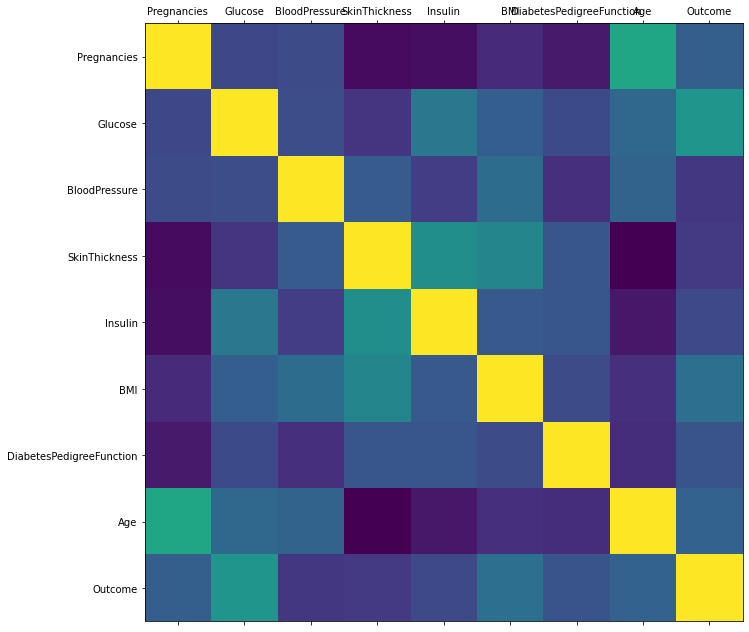

In [4]:
def plot_corr(df, size=11):
    corr = df.corr() # data frame corelation
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Selecting Features

In [7]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]

X = df[feature_cols] # features for the prediction
y = df.Outcome # target variable

### Split into test and train

In [8]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [9]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(614, 8)

(614,)

(154, 8)

(154,)

### Train the model

In [10]:
# Instantiate the model using the default parameters
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

#fit the model with the data
lr.fit(X_train, y_train)

print("model train score: %.3f" % lr.score(X_train, y_train))

model train score: 0.764


### Predict with Test Dataset

In [11]:
y_pred = lr.predict(X_test)

In [12]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Model evaluation

#### Confusion matrix

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

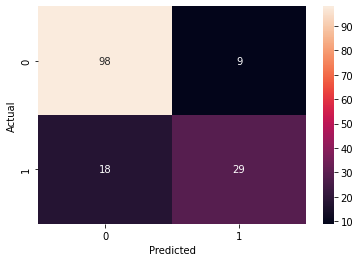

In [14]:
cnf_matrix = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

### Accuracy Score

In [15]:
accuracyScore = metrics.accuracy_score(y_test,y_pred)
print('Accuracy score : ', accuracyScore)
print("Accuracy in Percentage : ", int(accuracyScore*100),'%')

Accuracy score :  0.8246753246753247
Accuracy in Percentage :  82 %


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

